# UTILS

In [105]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import os
import PIL
from PIL import Image
import pathlib
import pickle

import matplotlib.pyplot as plt

from scipy.stats import uniform, randint
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV

# Load Data & Models

In [106]:
df = pd.read_csv("data/data_pp.csv", index_col=0)

df.head(2)

,Name,Price,Description,Updated,Size,RequiresAndroid,ContentRating,InAppProductsMin,InAppProductsMax,InAppProductsMean,InAppProductsBinary,Target,NumOfWord,AvgNumOfChars,AdventureGenre,ArcadeGenre,BoardGenre,CardGenre,CasinoGenre,CasualGenre,EducationalGenre,MusicGenre,PuzzleGenre,RacingGenre,RolePlayingGenre,SimulationGenre,SportsGenre,StrategyGenre,TriviaGenre,WordGenre,DigitalPurchasesIE,InAppPurchasesIE,InGamePurchasesIE,SharesInfoIE,SharesLocationIE,UsersInteractIE,LastUpdate,LastUpdateLn,BabybusOB,BimiBooKidsLearningGamesForToddlersFzLlcOB,BudgeStudiosOB,ElectronicArtsOB,G5EntertainmentOB,GameloftSeOB,JamCityIncOB,KairosoftOB,MiniclipComOB,OtherOB,YatelandLearningGamesForKidsOB,ZyngaOB,FreeOrNot,PriceSegment,SizeLn2,Rmean,Gmean,Bmean,Rstd,Gstd,Bstd
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Geometry Dash Lite,0.0,Jump and fly your way through danger in this r...,2019-12-11,58.0,4.0,1,0.00,0.00,0.00,0,35.2,3.0,5.333333,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,900,6.802395,0,0,0,0,0,0,0,0,0,1,0,0,1.0,0.0,5.857981,109.975656,123.210478,55.596528,117.723707,78.084704,73.268847
1,Fastlane: Road to Revenge,0.0,THEY TOOK YOUR CITY. THEY SHOULD’VE TAKEN YOUR...,2021-08-16,92.0,4.4,2,0.99,99.99,50.49,1,32.2,4.0,5.250000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,286,5.655992,0,0,0,0,0,0,0,0,0,1,0,0,1.0,0.0,6.523562,111.865795,123.851474,104.913302,78.302310,87.087182,76.248771


In [107]:
# load splitted indexes
with open('data/split_dict.pkl', 'rb') as f:
    split_dict = pickle.load(f)

In [108]:
from tensorflow.keras.models import load_model

In [161]:
# Load the model
nlp_model = load_model('models/nlp_model.h5') 

In [110]:
# load model dictionary
with open('models/model_dict.pkl', 'rb') as dict_handle:
    model_dict = pickle.load(dict_handle)

# MODELS

In [111]:
df.head(1)

,Name,Price,Description,Updated,Size,RequiresAndroid,ContentRating,InAppProductsMin,InAppProductsMax,InAppProductsMean,InAppProductsBinary,Target,NumOfWord,AvgNumOfChars,AdventureGenre,ArcadeGenre,BoardGenre,CardGenre,CasinoGenre,CasualGenre,EducationalGenre,MusicGenre,PuzzleGenre,RacingGenre,RolePlayingGenre,SimulationGenre,SportsGenre,StrategyGenre,TriviaGenre,WordGenre,DigitalPurchasesIE,InAppPurchasesIE,InGamePurchasesIE,SharesInfoIE,SharesLocationIE,UsersInteractIE,LastUpdate,LastUpdateLn,BabybusOB,BimiBooKidsLearningGamesForToddlersFzLlcOB,BudgeStudiosOB,ElectronicArtsOB,G5EntertainmentOB,GameloftSeOB,JamCityIncOB,KairosoftOB,MiniclipComOB,OtherOB,YatelandLearningGamesForKidsOB,ZyngaOB,FreeOrNot,PriceSegment,SizeLn2,Rmean,Gmean,Bmean,Rstd,Gstd,Bstd
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Geometry Dash Lite,0.0,Jump and fly your way through danger in this r...,2019-12-11,58.0,4.0,1,0.0,0.0,0.0,0,35.2,3.0,5.333333,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,900,6.802395,0,0,0,0,0,0,0,0,0,1,0,0,1.0,0.0,5.857981,109.975656,123.210478,55.596528,117.723707,78.084704,73.268847


## Preparation

In [132]:
class FinalModels:

        def __init__(self, df):
                self.train_ids = split_dict["train"]
                self.test_ids = split_dict["train"]
                self.val_ids = split_dict["val"]

                self.df = df

        # tabular columns
        tb_cols = ["Price","Size","RequiresAndroid",
            "ContentRating","InAppProductsMin","InAppProductsMax",
            "InAppProductsMean","InAppProductsBinary",
            "NumOfWord","AvgNumOfChars",
            "LastUpdate","LastUpdateLn","FreeOrNot","PriceSegment","SizeLn2"] \
            + [i for i in df.columns if i.endswith("IE")]\
            + [i for i in df.columns if i.endswith("OB")]\
            + [i for i in df.columns if i.endswith("G")]\
            + ["Target"]
# "R_mean","G_mean","B_mean",
# "R_std","G_std","B_std",
        
        target_name= "Target"

        def get_data(self, cols:list):
                Xy_train = self.df.loc[self.train_ids, cols]
                Xy_test = self.df.loc[self.test_ids, cols]
                Xy_val = self.df.loc[self.val_ids, cols]

                X_train = Xy_train.drop(columns=[self.target_name])
                X_test = Xy_test.drop(columns=[self.target_name])
                X_val = Xy_val.drop(columns=[self.target_name])

                y_train = Xy_train[[self.target_name]]
                y_test = Xy_test[[self.target_name]]
                y_val = Xy_val[[self.target_name]]

                return X_train, X_test, X_val, y_train, y_test, y_val

In [133]:
df.head(2)

,Name,Price,Description,Updated,Size,RequiresAndroid,ContentRating,InAppProductsMin,InAppProductsMax,InAppProductsMean,InAppProductsBinary,Target,NumOfWord,AvgNumOfChars,AdventureGenre,ArcadeGenre,BoardGenre,CardGenre,CasinoGenre,CasualGenre,EducationalGenre,MusicGenre,PuzzleGenre,RacingGenre,RolePlayingGenre,SimulationGenre,SportsGenre,StrategyGenre,TriviaGenre,WordGenre,DigitalPurchasesIE,InAppPurchasesIE,InGamePurchasesIE,SharesInfoIE,SharesLocationIE,UsersInteractIE,LastUpdate,LastUpdateLn,BabybusOB,BimiBooKidsLearningGamesForToddlersFzLlcOB,BudgeStudiosOB,ElectronicArtsOB,G5EntertainmentOB,GameloftSeOB,JamCityIncOB,KairosoftOB,MiniclipComOB,OtherOB,YatelandLearningGamesForKidsOB,ZyngaOB,FreeOrNot,PriceSegment,SizeLn2,Rmean,Gmean,Bmean,Rstd,Gstd,Bstd
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Geometry Dash Lite,0.0,Jump and fly your way through danger in this r...,2019-12-11,58.0,4.0,1,0.00,0.00,0.00,0,35.2,3.0,5.333333,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,900,6.802395,0,0,0,0,0,0,0,0,0,1,0,0,1.0,0.0,5.857981,109.975656,123.210478,55.596528,117.723707,78.084704,73.268847
1,Fastlane: Road to Revenge,0.0,THEY TOOK YOUR CITY. THEY SHOULD’VE TAKEN YOUR...,2021-08-16,92.0,4.4,2,0.99,99.99,50.49,1,32.2,4.0,5.250000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,286,5.655992,0,0,0,0,0,0,0,0,0,1,0,0,1.0,0.0,6.523562,111.865795,123.851474,104.913302,78.302310,87.087182,76.248771


### Demonstrating the class

In [134]:
Data = FinalModels(df)

In [135]:
Data.df[Data.tb_cols].head(2)

,Price,Size,RequiresAndroid,ContentRating,InAppProductsMin,InAppProductsMax,InAppProductsMean,InAppProductsBinary,NumOfWord,AvgNumOfChars,LastUpdate,LastUpdateLn,FreeOrNot,PriceSegment,SizeLn2,DigitalPurchasesIE,InAppPurchasesIE,InGamePurchasesIE,SharesInfoIE,SharesLocationIE,UsersInteractIE,BabybusOB,BimiBooKidsLearningGamesForToddlersFzLlcOB,BudgeStudiosOB,ElectronicArtsOB,G5EntertainmentOB,GameloftSeOB,JamCityIncOB,KairosoftOB,MiniclipComOB,OtherOB,YatelandLearningGamesForKidsOB,ZyngaOB,Target
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,58.0,4.0,1,0.00,0.00,0.00,0,3.0,5.333333,900,6.802395,1.0,0.0,5.857981,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,35.2
1,0.0,92.0,4.4,2,0.99,99.99,50.49,1,4.0,5.250000,286,5.655992,1.0,0.0,6.523562,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,32.2


### Scaler

In [136]:
from sklearn.preprocessing import StandardScaler

r_scaler = StandardScaler()

### Creating universal Cross Validation

In [139]:
from sklearn.model_selection import KFold

In [140]:
k_cv = KFold(n_splits=3, shuffle=True, random_state=42)

## Benchmarks

In [141]:
X_train_bm, X_test_bm, X_val_bm, y_train_bm, y_test_bm, y_val_bm = Data.get_data(cols=Data.tb_cols)

### 1) KNN

In [138]:
from sklearn.neighbors import KNeighborsRegressor

### Hyper Param Search

In [142]:
knn_clf = KNeighborsRegressor()

knn_r_grid = {
    "clf__n_neighbors":[5,10,25,50,80,120]
    }

# grids manually altered

knn_pipe = Pipeline([("scaler", r_scaler), ("clf", knn_clf)])
knn_Ser = GridSearchCV(estimator = knn_pipe, param_grid= knn_r_grid, scoring=["neg_mean_squared_error","neg_mean_absolute_percentage_error"], refit="neg_mean_squared_error", cv = k_cv, verbose=2, n_jobs = -1)


In [143]:
knn_Ser.fit(X_train_bm, y_train_bm)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[CV] END ................................clf__n_neighbors=10; total time=   0.1s
[CV] END .................................clf__n_neighbors=5; total time=   0.1s
[CV] END .................................clf__n_neighbors=5; total time=   0.1s
[CV] END ................................clf__n_neighbors=10; total time=   0.1s
[CV] END ................................clf__n_neighbors=10; total time=   0.1s
[CV] END ................................clf__n_neighbors=25; total time=   0.1s
[CV] END .................................clf__n_neighbors=5; total time=   0.1s
[CV] END ................................clf__n_neighbors=25; total time=   0.1s
[CV] END ................................clf__n_neighbors=25; total time=   0.0s
[CV] END ................................clf__n_neighbors=50; total time=   0.0s
[CV] END ................................clf__n_neighbors=50; total time=   0.0s
[CV] END ................................clf__n_neighbors=50; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'clf__n_neighbors': [5, 10, 25, 50, 80, 120]},
             refit='neg_mean_squared_error',
             scoring=['neg_mean_squared_error',
                      'neg_mean_absolute_percentage_error'],
             verbose=2)

In [144]:
knn_cv_scores = (pd.DataFrame(knn_Ser.cv_results_)[["param_clf__n_neighbors","mean_test_neg_mean_absolute_percentage_error"]]).sort_values(by=["mean_test_neg_mean_absolute_percentage_error"], ascending=False)
knn_cv_scores

,param_clf__n_neighbors,mean_test_neg_mean_absolute_percentage_error
2,25,-0.136322
1,10,-0.136934
3,50,-0.137793
4,80,-0.138402
5,120,-0.140733
0,5,-0.141275


### 2) Random Forrest Regressor

In [145]:
from sklearn.ensemble import RandomForestRegressor

In [146]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 75, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

criterion = ["squared_error"]
rf_r_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion':criterion,
               'max_samples':uniform(0.7,0.3)}

In [147]:
rf_clf = RandomForestRegressor(n_jobs = -1)
rf_Ser = RandomizedSearchCV(estimator = rf_clf, param_distributions = rf_r_grid, scoring=["neg_mean_squared_error","neg_mean_absolute_percentage_error"], refit="neg_mean_squared_error", cv = k_cv, n_iter = 5, verbose=2, random_state=42, n_jobs = -1)
rf_Ser.fit(X_train_bm, y_train_bm)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

[CV] END criterion=squared_error, max_depth=49, max_features=sqrt, max_samples=0.9852142919229747, min_samples_leaf=4, min_samples_split=2, n_estimators=555; total time=   1.7s
[CV] END criterion=squared_error, max_depth=49, max_features=sqrt, max_samples=0.9852142919229747, min_samples_leaf=4, min_samples_split=2, n_estimators=555; total time=   1.8s
[CV] END criterion=squared_error, max_depth=49, max_features=sqrt, max_samples=0.9852142919229747, min_samples_leaf=4, min_samples_split=2, n_estimators=555; total time=   1.8s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END criterion=squared_error, max_depth=36, max_features=sqrt, max_samples=0.7428600453765822, min_samples_leaf=4, min_samples_split=5, n_estimators=555; total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END criterion=squared_error, max_depth=36, max_features=sqrt, max_samples=0.7428600453765822, min_samples_leaf=4, min_samples_split=5, n_estimators=555; total time=   2.1s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END criterion=squared_error, max_depth=10, max_features=sqrt, max_samples=0.8834959481464842, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END criterion=squared_error, max_depth=49, max_features=sqrt, max_samples=0.7467983561008608, min_samples_leaf=4, min_samples_split=10, n_estimators=822; total time=   3.1s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END criterion=squared_error, max_depth=49, max_features=sqrt, max_samples=0.7467983561008608, min_samples_leaf=4, min_samples_split=10, n_estimators=822; total time=   3.3s
[CV] END criterion=squared_error, max_depth=49, max_features=sqrt, max_samples=0.7467983561008608, min_samples_leaf=4, min_samples_split=10, n_estimators=822; total time=   3.4s
[CV] END criterion=squared_error, max_depth=10, max_features=sqrt, max_samples=0.8834959481464842, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END criterion=squared_error, max_depth=10, max_features=sqrt, max_samples=0.8834959481464842, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END criterion=squared_error, max_depth=36, max_features=sqrt, max_samples=0.7428600453765822, min_samples_leaf=4, min_samples_split=5, n_estimators=555; total time=   2.3s
[CV] END criterion=squared_error, max_depth=16, max_features=sqrt, max_samples=0.9497327922401264, min_samples_le

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=RandomForestRegressor(n_jobs=-1), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error'],
                                        'max_depth': [10, 16, 23, 29, 36, 42,
                                                      49, 55, 62, 68, 75,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'max_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x13c3d7c40>,
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=42, refit='neg_mean_squared_error',
                   scoring=['neg_mean_squared_error',
                            'neg_mean_absolute_percentage_error'],
                   verbose=2)

In [148]:
rf_cv_scores = (pd.DataFrame(rf_Ser.cv_results_)[["mean_test_neg_mean_absolute_percentage_error"]])\
.sort_values(by=["mean_test_neg_mean_absolute_percentage_error"], ascending=False)
rf_cv_scores.head()

,mean_test_neg_mean_absolute_percentage_error
3,-0.132459
4,-0.132651
0,-0.133208
2,-0.133401
1,-0.133427


In [223]:
rf_cv_scores = (pd.DataFrame(rf_Ser.cv_results_)[["mean_test_neg_mean_absolute_percentage_error"]])\
.sort_values(by=["mean_test_neg_mean_absolute_percentage_error"], ascending=False)
rf_cv_scores.head()

,mean_test_neg_mean_absolute_percentage_error
3,-0.127217
4,-0.128187
0,-0.128400
2,-0.128718
1,-0.128770


## 3.1) Feed Forward Neural Network 
with only tabular data

In [151]:
df.head(2)

,Name,Price,Description,Updated,Size,RequiresAndroid,ContentRating,InAppProductsMin,InAppProductsMax,InAppProductsMean,InAppProductsBinary,Target,NumOfWord,AvgNumOfChars,AdventureGenre,ArcadeGenre,BoardGenre,CardGenre,CasinoGenre,CasualGenre,EducationalGenre,MusicGenre,PuzzleGenre,RacingGenre,RolePlayingGenre,SimulationGenre,SportsGenre,StrategyGenre,TriviaGenre,WordGenre,DigitalPurchasesIE,InAppPurchasesIE,InGamePurchasesIE,SharesInfoIE,SharesLocationIE,UsersInteractIE,LastUpdate,LastUpdateLn,BabybusOB,BimiBooKidsLearningGamesForToddlersFzLlcOB,BudgeStudiosOB,ElectronicArtsOB,G5EntertainmentOB,GameloftSeOB,JamCityIncOB,KairosoftOB,MiniclipComOB,OtherOB,YatelandLearningGamesForKidsOB,ZyngaOB,FreeOrNot,PriceSegment,SizeLn2,Rmean,Gmean,Bmean,Rstd,Gstd,Bstd
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Geometry Dash Lite,0.0,Jump and fly your way through danger in this r...,2019-12-11,58.0,4.0,1,0.00,0.00,0.00,0,35.2,3.0,5.333333,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,900,6.802395,0,0,0,0,0,0,0,0,0,1,0,0,1.0,0.0,5.857981,109.975656,123.210478,55.596528,117.723707,78.084704,73.268847
1,Fastlane: Road to Revenge,0.0,THEY TOOK YOUR CITY. THEY SHOULD’VE TAKEN YOUR...,2021-08-16,92.0,4.4,2,0.99,99.99,50.49,1,32.2,4.0,5.250000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,286,5.655992,0,0,0,0,0,0,0,0,0,1,0,0,1.0,0.0,6.523562,111.865795,123.851474,104.913302,78.302310,87.087182,76.248771


### Scaling

In [152]:
# Standard scaler Scaler
X_train_bm_sc = r_scaler.fit_transform(X_train_bm)
X_test_bm_sc = r_scaler.transform(X_test_bm)

### Model Creation

In [153]:
from tensorflow import keras
from tensorflow import nn

In [155]:
Input_ = keras.Input(shape=(X_train_bm_sc.shape[1],),name="Input Layer")
Hidden1_ = keras.layers.Dense(32, activation=keras.activations.relu,name="Hidden_Layer_1")(Input_)
Dropout1_ = keras.layers.Dropout(0.3)(Hidden1_)
Hidden2_ = keras.layers.Dense(32, activation=keras.activations.relu,name="Hidden_Layer_2")(Dropout1_)
Dropout2_ = keras.layers.Dropout(0.3)(Hidden2_)
Output_ = keras.layers.Dense(1, activation=keras.activations.linear, name="Output")(Dropout2_)
ann_clf = keras.Model(inputs=[Input_], outputs=[Output_])
ann_clf.summary()

ann_clf.compile(optimizer=keras.optimizers.Adam(), loss = keras.losses.MeanSquaredError() , 
metrics=[keras.metrics.MeanAbsolutePercentageError()])

early_stop = keras.callbacks.EarlyStopping(monitor="val_loss",patience=15)


Model: "model_1"


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Layer (InputLayer)    [(None, 33)]              0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 32)                1088      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 Hidden_Layer_2 (Dense)      (None, 32)                1056      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 2,177
Trainable params: 2,177
Non-trainable params: 0
________

In [156]:
history_ann = ann_clf.fit(X_train_bm_sc,y_train_bm,epochs=200,validation_split=0.15,
verbose=2,callbacks=[early_stop],batch_size=32, 
)

Epoch 1/200
46/46 - 1s - loss: 676.7011 - mean_absolute_percentage_error: 94.1760 - val_loss: 602.6207 - val_mean_absolute_percentage_error: 87.5971 - 1s/epoch - 32ms/step
Epoch 2/200
46/46 - 0s - loss: 473.6250 - mean_absolute_percentage_error: 76.0434 - val_loss: 335.1833 - val_mean_absolute_percentage_error: 61.9191 - 101ms/epoch - 2ms/step
Epoch 3/200
46/46 - 0s - loss: 214.5752 - mean_absolute_percentage_error: 46.8206 - val_loss: 90.5018 - val_mean_absolute_percentage_error: 29.0883 - 94ms/epoch - 2ms/step
Epoch 4/200
46/46 - 0s - loss: 94.1422 - mean_absolute_percentage_error: 29.4999 - val_loss: 41.5339 - val_mean_absolute_percentage_error: 19.8234 - 96ms/epoch - 2ms/step
Epoch 5/200
46/46 - 0s - loss: 75.7373 - mean_absolute_percentage_error: 26.8947 - val_loss: 33.8257 - val_mean_absolute_percentage_error: 18.0149 - 96ms/epoch - 2ms/step
Epoch 6/200
46/46 - 0s - loss: 69.5564 - mean_absolute_percentage_error: 25.7376 - val_loss: 31.6872 - val_mean_absolute_percentage_error: 1

### Plot

In [157]:
import seaborn as sns

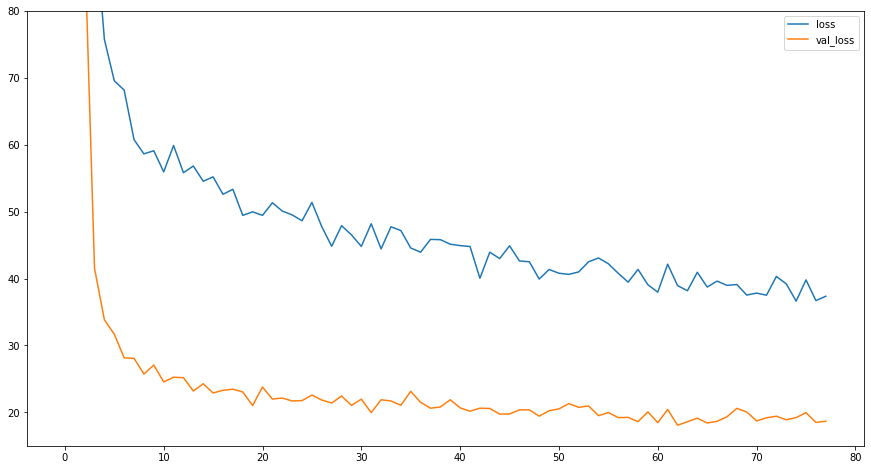

In [159]:
plt.figure(figsize=(15,8))
history_df = pd.DataFrame(history_ann.history)
sns.lineplot(data=history_df[["loss","val_loss"]],dashes=False)
# plt.scatter(len(history_df) , mse_dnn, marker="o",color = "r")
# plt.xlim(-2,50)
plt.ylim(15,80)
plt.show()

## 3.2) Feed Forward Neural Network 
with NLP model

In [179]:
from keras.models import Model

layer_output = nlp_model.layers[-2].output
nlp_model_modified = Model(inputs=nlp_model.input, outputs=layer_output)

for layer in nlp_model.layers[:-1]:
    layer.trainable = False

In [ ]:
tabular_input = Input(shape=(num_tabular_features,), name='tabular_input')

# Get the output from the second last layer of the NLP model
nlp_output = nlp_model_modified.output

# Combine the NLP output and the tabular input
combined_input = Concatenate()([nlp_output, tabular_input])

# Add additional layers on top of the combined input as needed
combined_dense = Dense(256, activation='relu')(combined_input)
combined_dropout = Dropout(0.5)(combined_dense)
final_output = Dense(1, name='final_output')(combined_dropout)  # Assuming a regression problem

# Create the combined model
combined_model = Model(inputs=[nlp_model_modified.input, tabular_input], outputs=final_output)

In [ ]:
from tensorflow.keras.layers import Input, Dense, Concatenate




tabular_input = Input(shape=(num_tabular_features,), name='tabular_input')

text_output = pre_trained_model.output

combined_input = Concatenate()([text_output, tabular_input])

In [170]:
nlp_model.output

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_5')>

### TEST Scores

In [ ]:
pred_dnn = ann_clf.predict(X_test_bm_sc)

from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error

mse_dnn = mean_squared_error(y_test , pred_dnn)
mape_dnn = mean_absolute_percentage_error(y_test , pred_dnn)
mae_dnn = mean_absolute_error(y_test , pred_dnn)

Scores_df_dnn = pd.DataFrame(index=["Validation","Test"],columns=["mse","mape","mae"])
Scores_df_dnn.loc["Validation",:] = [history_dnn.history["loss"][-1] , history_dnn.history["mape"][-1] , history_dnn.history["mae"][-1]]
Scores_df_dnn.loc["Test",:] = [mse_dnn , mape_dnn*100 , mae_dnn]
Scores_df_dnn.loc["Percentage_Difference",:] = (Scores_df_dnn.loc["Test"] - Scores_df_dnn.loc["Validation"])/Scores_df_dnn.loc["Test"]*100

Scores_df_dnn

,mse,mape,mae
Validation,6.659935,8.047577,2.005603
Test,9.859986,10.382125,2.282136
Percentage_Difference,32.454925,22.486229,12.117279


## 4) FFNN + CNN (Feed Forward Neural Net. + Convunutional Neural Network)

### Splitting CNN's data

In [ ]:
# # CNN SPLIT

# reduced_size = (28,28) # Images' sizes reduced due to deficiency of computing power

# X_train_image = []
# for idx in X_train.index:
#     current_image = PIL.Image.open(image_df.loc[idx,"full_paths"])
#     current_image = current_image.resize(reduced_size)
#     arr = np.array(current_image)
#     X_train_image.append(arr)

# X_train_image = np.array(X_train_image)

# X_test_image = []
# for idx in X_test.index:
#     current_image = PIL.Image.open(image_df.loc[idx,"full_paths"])
#     current_image = current_image.resize(reduced_size)
#     arr = np.array(current_image)
#     X_test_image.append(arr)

# X_test_image = np.array(X_test_image)

### Scaling

In [232]:
X_train_imgs = Data.train_imgs/255
X_test_imgs = Data.test_imgs/255

### Model Creation

In [239]:
Input_tb_ = keras.Input(shape=(X_train_bm_sc.shape[1],),name="TabularInput")
Hidden1_tb_ = keras.layers.Dense(32, activation=keras.activations.relu,name="TBHidden1")(Input_tb_)
Dropout1_tb_ = keras.layers.Dropout(0.3)(Hidden1_tb_)
Hidden2_tb_ = keras.layers.Dense(16, activation=keras.activations.relu,name="TBHidden2")(Dropout1_tb_)
Dropout2_tb_ = keras.layers.Dropout(0.3)(Hidden2_tb_)

Input_img_ = keras.Input(shape = X_train_imgs.shape[1:])
Conv1_img_ = keras.layers.Conv2D(16, kernel_size=(3,3), activation="relu")(Input_img_)
Pool1_img_ = keras.layers.MaxPool2D(pool_size=(2,2))(Conv1_img_)
Conv2_img_ = keras.layers.Conv2D(8, kernel_size=(3,3), activation="relu")(Pool1_img_)
Pool2_img_ = keras.layers.MaxPool2D(pool_size=(2,2))(Conv2_img_)
Flatten_img_ = keras.layers.Flatten()(Pool2_img_)
Hidden1_img_ = keras.layers.Dense(32, activation="swish")(Flatten_img_)
Dropout_img_ = keras.layers.Dropout(0.2)(Hidden1_img_)
Hidden2_img_ = keras.layers.Dense(16, activation="tanh")(Dropout_img_)

# # - 
# inputs = keras.Input(shape = X_train_image.shape[1:])
# conv1 = layers.Conv2D(16, kernel_size=(3,3), activation="relu")(inputs)
# pool1 = layers.MaxPool2D(pool_size=(2,2))(conv1)
# conv2 = layers.Conv2D(8, kernel_size=(3,3), activation="relu")(pool1)
# pool2 = layers.MaxPool2D(pool_size=(2,2))(conv2)
# flatten = layers.Flatten()(pool2)

# x = layers.Dense(64, activation="swish")(flatten)
# Dropout = tf.keras.layers.Dropout(0.1)(x)
# x = layers.Dense(64, activation="tanh")(Dropout)
# # - 


Concat_ = keras.layers.concatenate([Dropout2_tb_, Hidden2_img_])
Hidden3_ = keras.layers.Dense(32, activation=keras.activations.relu,name="LastHidden")(Concat_)

Outputs_ = keras.layers.Dense(1, activation="linear")(Hidden3_)

mdl = keras.Model(inputs = [Input_tb_, Input_img_], outputs = [Outputs_])

mdl.summary()

mdl.compile(optimizer=keras.optimizers.Adam(), loss = keras.losses.MeanSquaredError() , 
metrics=[keras.metrics.MeanAbsolutePercentageError()])

early_stop = keras.callbacks.EarlyStopping(monitor="val_loss",patience=15)

Model: "model_22"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_21 (InputLayer)          [(None, 28, 28, 3)]  0           []                               
                                                                                                  
 conv2d_40 (Conv2D)             (None, 26, 26, 16)   448         ['input_21[0][0]']               
                                                                                                  
 max_pooling2d_40 (MaxPooling2D  (None, 13, 13, 16)  0           ['conv2d_40[0][0]']              
 )                                                                                                
                                                                                                  
 conv2d_41 (Conv2D)             (None, 11, 11, 8)    1160        ['max_pooling2d_40[0][0]']

In [240]:
history_ann = mdl.fit([X_train_bm_sc, X_train_imgs], y_train_bm, epochs=200, validation_split=0.15,
verbose=2,callbacks=[early_stop],batch_size=16)

Epoch 1/200
99/99 - 4s - loss: 443.8622 - mean_absolute_percentage_error: 72.4291 - val_loss: 105.1411 - val_mean_absolute_percentage_error: 30.6859 - 4s/epoch - 35ms/step
Epoch 2/200
99/99 - 1s - loss: 57.0688 - mean_absolute_percentage_error: 22.9033 - val_loss: 41.4028 - val_mean_absolute_percentage_error: 16.1832 - 995ms/epoch - 10ms/step
Epoch 3/200
99/99 - 1s - loss: 38.3693 - mean_absolute_percentage_error: 19.1148 - val_loss: 28.8348 - val_mean_absolute_percentage_error: 14.8836 - 999ms/epoch - 10ms/step
Epoch 4/200
99/99 - 1s - loss: 28.3944 - mean_absolute_percentage_error: 16.5609 - val_loss: 22.0374 - val_mean_absolute_percentage_error: 14.0084 - 997ms/epoch - 10ms/step
Epoch 5/200
99/99 - 1s - loss: 24.2279 - mean_absolute_percentage_error: 15.4195 - val_loss: 19.4730 - val_mean_absolute_percentage_error: 13.7471 - 997ms/epoch - 10ms/step
Epoch 6/200
99/99 - 1s - loss: 21.0827 - mean_absolute_percentage_error: 14.6564 - val_loss: 18.4294 - val_mean_absolute_percentage_erro

In [ ]:
inputs = keras.Input(shape = X_train_image.shape[1:])
conv1 = layers.Conv2D(16, kernel_size=(3,3), activation="relu")(inputs)
pool1 = layers.MaxPool2D(pool_size=(2,2))(conv1)
conv2 = layers.Conv2D(8, kernel_size=(3,3), activation="relu")(pool1)
pool2 = layers.MaxPool2D(pool_size=(2,2))(conv2)
flatten = layers.Flatten()(pool2)

x = layers.Dense(64, activation="swish")(flatten)
Dropout = tf.keras.layers.Dropout(0.1)(x)
x = layers.Dense(64, activation="tanh")(Dropout)

outputs = layers.Dense(1, activation="relu")(x)

mdl = keras.Model(inputs = inputs, outputs = outputs)

mdl.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                1286

In [ ]:
mdl.compile(optimizer="adam" , loss = "mse" , metrics=["mape","mae"])

early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=25)

history_cnn = mdl.fit(X_train_image,y_train,epochs=10,validation_split=0.15,verbose=1,callbacks=[early_stop])

Epoch 1/10
48/48 [==============================] - 2s 27ms/step - loss: 409.8569 - mape: 70.7403 - mae: 19.3238 - val_loss: 242.1642 - val_mape: 54.2672 - val_mae: 14.8916
Epoch 2/10
48/48 [==============================] - 1s 17ms/step - loss: 208.8163 - mape: 48.6000 - mae: 13.5779 - val_loss: 159.8538 - val_mape: 42.5513 - val_mae: 11.8316
Epoch 3/10
48/48 [==============================] - 1s 16ms/step - loss: 139.4894 - mape: 37.9945 - mae: 10.7861 - val_loss: 105.3470 - val_mape: 32.9629 - val_mae: 9.3000
Epoch 4/10
48/48 [==============================] - 1s 16ms/step - loss: 93.3062 - mape: 29.8310 - mae: 8.5489 - val_loss: 69.4002 - val_mape: 25.3235 - val_mae: 7.2340
Epoch 5/10
48/48 [==============================] - 1s 16ms/step - loss: 63.7597 - mape: 24.0199 - mae: 6.8705 - val_loss: 47.3582 - val_mape: 20.4142 - val_mae: 5.8116
Epoch 6/10
48/48 [==============================] - 1s 17ms/step - loss: 45.6253 - mape: 20.1762 - mae: 5.6860 - val_loss: 34.3058 - val_mape: 1

### TEST Scores

In [ ]:
pred_cnn = mdl.predict(X_test_image)

from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error

mse_cnn = mean_squared_error(y_test , pred_cnn)
mape_cnn = mean_absolute_percentage_error(y_test , pred_cnn)
mae_cnn = mean_absolute_error(y_test , pred_cnn)

Scores_df_cnn = pd.DataFrame(index=["Validation","Test"],columns=["mse","mape","mae"])
Scores_df_cnn.loc["Validation",:] = [history_cnn.history["loss"][-1] , history_cnn.history["mape"][-1] , history_cnn.history["mae"][-1]]
Scores_df_cnn.loc["Test",:] = [mse_cnn , mape_cnn*100 , mae_cnn]
Scores_df_cnn.loc["Percentage_Difference",:] = (Scores_df_cnn.loc["Test"] - Scores_df_cnn.loc["Validation"])/Scores_df_cnn.loc["Test"]*100

Scores_df_cnn

,mse,mape,mae
Validation,25.102423,15.859835,4.038238
Test,27.318265,17.309494,4.183724
Percentage_Difference,8.11121,8.374938,3.477438


### Plot

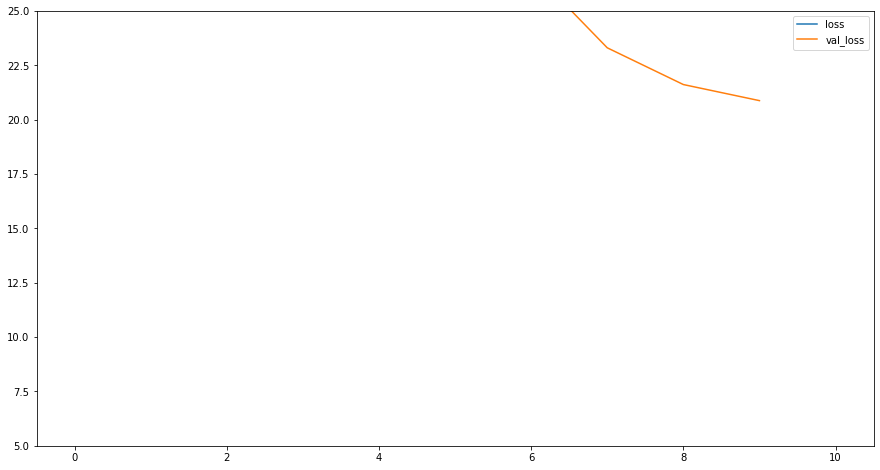

In [ ]:
plt.figure(figsize=(15,8))
history_df = pd.DataFrame(history_cnn.history)
sns.lineplot(data=history_df[["loss","val_loss"]],dashes=False)
plt.scatter(len(history_df) , mse_cnn, marker="o",color = "r")
# plt.xlim(-2,50)
plt.ylim(5,25)

plt.show()

## Downloading NLP's resuls

In [ ]:
lstm_results_train = pd.read_csv("lstm_results_train.csv",index_col=0)
lstm_results_test = pd.read_csv("lstm_results_test.csv",index_col=0)

In [ ]:
lstm_results_train.head()

,target,lstm_result_tr
1681,21.500000,21.713280
1195,29.475468,30.310078
985,16.400000,19.128582
862,20.516292,21.284727
1017,31.485159,29.244856


In [ ]:
lstm_results_test.head()

,target,lstm_result
1094,27.600000,26.112827
188,26.600000,26.355648
1800,32.335674,25.619324
707,23.000000,25.130505
679,28.805571,27.756561


### TEST Scores

In [ ]:
mse_nlp = mean_squared_error(y_test , lstm_results_test["lstm_result"])
mape_nlp = mean_absolute_percentage_error(y_test , lstm_results_test["lstm_result"])
mae_nlp = mean_absolute_error(y_test , lstm_results_test["lstm_result"])

Scores_df_nlp = pd.DataFrame(index=["Test"],columns=["mse","mape","mae"])
Scores_df_nlp.loc["Test",:] = [mse_nlp , mape_nlp*100 , mae_nlp]

Scores_df_nlp

,mse,mape,mae
Test,32.178437,18.770643,4.553034


In [ ]:
mse_nlp = mean_squared_error(y_train , lstm_results_train["lstm_result_tr"])
mse_nlp

# **OVERFIT IN NLP**

4.809008975247715

In [ ]:
Scores_df_nlp

,mse,mape,mae
Test,32.178437,18.770643,4.553034


## Combining **DNN & CNN & NLP**

In [ ]:
dnn_results = model.predict(X_test_scaled)
cnn_results = mdl.predict(X_test_image)
nlp_results = lstm_results_test["lstm_result"].values.reshape(-1,1)

dnn_weight = 0.6
cnn_weight = 0.2
nlp_weight = 0.2

final_results = (dnn_results*dnn_weight) + (cnn_results*cnn_weight) + (nlp_results*nlp_weight)

In [ ]:
dnn_results.shape , cnn_results.shape , nlp_results.shape

((593, 1), (593, 1), (593, 1))

## HYBRID MODEL RESULTS

In [ ]:
mse_hybrid = mean_squared_error(y_test , final_results)
mape_hybrid = mean_absolute_percentage_error(y_test , final_results)
mae_hybrid = mean_absolute_error(y_test , final_results)

Scores_df_hybrid = pd.DataFrame(index=["Test"],columns=["mse","mape","mae"])
Scores_df_hybrid.loc["Test",:] = [mse_hybrid , mape_hybrid*100 , mae_hybrid]

Scores_df_hybrid

,mse,mape,mae
Test,12.771636,11.839032,2.678785


In [ ]:
dnn_arr = Scores_df_dnn.loc["Test",:].values.reshape(1,3)
cnn_arr = Scores_df_cnn.loc["Test",:].values.reshape(1,3)
nlp_arr = Scores_df_nlp.values
hybrid_arr = Scores_df_hybrid.values
full_arr = np.concatenate((dnn_arr,cnn_arr,nlp_arr,hybrid_arr))

In [ ]:
ALL_MODELS_RESULTS = pd.DataFrame(full_arr , index = ["DNN","CNN","NLP","HYBRID"],columns=["mse","mape","mae"])
ALL_MODELS_RESULTS

,mse,mape,mae
DNN,9.859986,10.382125,2.282136
CNN,27.318265,17.309494,4.183724
NLP,32.178437,18.770643,4.553034
HYBRID,12.771636,11.839032,2.678785
